For this second work, the labeling for the e-mail number 2 and email number 4 was changed and the building classifier process and tesitng repeated.

**FINDINGS**

I realized that there was no major change in the results as it was similar to the initial document (sample given). For my work, I changed the labeling in the text and hosted it on Amazon S3 for the analysis.

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=5c39d1c8a0784728a01d9fffa58262343b7fb5ea8f80af2fa63a29a2063dfc5a
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
#Importing the  data
import collections
import wget
text_file = wget.download(url="https://txtminer.s3.amazonaws.com/data-spam.txt")


In [ ]:
documents=[]
with open(text_file, "r") as f:
  for line in f.readlines():
   #print(line)       
    label = line[0]
    text = line[1:].strip()
    documents.append((label, text))
documents[:7]

[('0',
  'One of a kind Money maker! Try it for free! From nobody Tue Apr 11 08:39:19 2017 Content-Type: text/html; \tcharset="iso-8859-1" Content-Transfer-Encoding: 7bit  <body lang=EN-US>  <div class=Section1>   <p class=MsoBodyText style=\'text-align:justify\'><b>CONSANTLY</b> being bombarded by so-called “FREE” money-making systems that teases you with limited information, and when it’s all said and done, blind-sides you by demanding your money/credit card information upfront in some slick way,<b> after-the-fact</b>! Yes, I too was as skeptical about such offers and the Internet in general with all its hype, as you probably are. Fortunate for me, my main business slowed-down (<i>I have been self-employed all my life</i>), so I looked for something to fit my lifestyle and some other way to assist me in paying my bills, without working myself to death or loosing more money; then, this proposal to try something new without any upfront investment (<i>great! because I had none</i>) inte

In [ ]:
import pandas as pd
df = pd.DataFrame(documents, columns=['label', 'text'])
df

,label,text
0,0,One of a kind Money maker! Try it for free! Fr...
1,1,link to my webcam you wanted Wanna see sexual...
2,1,Re: How to manage multiple Internet connection...
3,1,[SPAM] Give her 3 hour rodeo Enhance your des...
4,0,Best Price on the netf5f8m1 (suddenlysusan@St...
...,...,...
4322,0,Aldebaran's Spring Special Offer From nobody T...
4323,1,RE: [ILUG] What HOWTOs for SOHO system Hi Derm...
4324,1,[Spambayes] hammie.py vs. GBayes.py Guido...
4325,0,[SPAM] Photos of Exposed Pink <HTML><HEAD><TI...


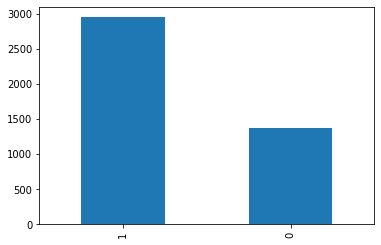

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
df.describe()

,label,text
count,4327,4327
unique,2,4112
top,1,"Re: ARRRGHHH Had GPG working, now it doesnt. I..."
freq,2951,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4327 non-null   object
 1   text    4327 non-null   object
dtypes: object(2)
memory usage: 67.7+ KB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
X=Vectorizer.fit_transform(df['text'])
X

<4327x95966 sparse matrix of type '<class 'numpy.int64'>'
	with 782280 stored elements in Compressed Sparse Row format>

**This is training and testing of the dataset using the first 10 emails**




In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], train_size=10, random_state=42)

print('Train data size', X_train.shape)
print('Test data size', X_train.shape)

Train data size (10, 95966)
Test data size (10, 95966)


Decision Tree is used to classify the dataset




In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier().fit(X_train, y_train)

predicted=clf.predict(X_test)
report = classification_report(y_true=y_test, y_pred=predicted, target_names=['spam','ham'])
print(report)

              precision    recall  f1-score   support

        spam       0.66      0.21      0.31      1374
         ham       0.72      0.95      0.82      2943

    accuracy                           0.71      4317
   macro avg       0.69      0.58      0.57      4317
weighted avg       0.70      0.71      0.66      4317



Naive Bayes is used to classify the dataset. 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(X_train, y_train)

predicted =clf.predict(X_test)
report = classification_report(y_true=y_test, y_pred=predicted, target_names=['spam', 'ham'])
print(report)

              precision    recall  f1-score   support

        spam       0.91      0.51      0.66      1374
         ham       0.81      0.97      0.89      2943

    accuracy                           0.83      4317
   macro avg       0.86      0.74      0.77      4317
weighted avg       0.84      0.83      0.81      4317



**[This is training and testing of the dataset using the first 20 emails](https://)**

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], train_size=20, random_state=42)

print('Train data size', X_train.shape)
print('Test data size', X_train.shape)

Train data size (20, 95966)
Test data size (20, 95966)


Decision Tree is used to classify the dataset


In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier().fit(X_train, y_train)

predicted=clf.predict(X_test)
report = classification_report(y_true=y_test, y_pred=predicted, target_names=['spam','ham'])
print(report)

              precision    recall  f1-score   support

        spam       0.89      0.51      0.65      1372
         ham       0.81      0.97      0.88      2935

    accuracy                           0.82      4307
   macro avg       0.85      0.74      0.77      4307
weighted avg       0.83      0.82      0.81      4307



Naive Bayes is used to classify the dataset


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(X_train, y_train)

predicted =clf.predict(X_test)
report = classification_report(y_true=y_test, y_pred=predicted, target_names=['spam', 'ham'])
print(report)

              precision    recall  f1-score   support

        spam       0.91      0.46      0.61      1372
         ham       0.79      0.98      0.88      2935

    accuracy                           0.81      4307
   macro avg       0.85      0.72      0.74      4307
weighted avg       0.83      0.81      0.79      4307



**This is training and testing of the dataset using the first 80 emails**

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], train_size=80, random_state=42)

print('Train data size', X_train.shape)
print('Test data size', X_train.shape)

Train data size (80, 95966)
Test data size (80, 95966)


In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier().fit(X_train, y_train)

predicted=clf.predict(X_test)
report = classification_report(y_true=y_test, y_pred=predicted, target_names=['spam','ham'])
print(report)

              precision    recall  f1-score   support

        spam       0.87      0.57      0.69      1355
         ham       0.83      0.96      0.89      2892

    accuracy                           0.83      4247
   macro avg       0.85      0.76      0.79      4247
weighted avg       0.84      0.83      0.82      4247



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(X_train, y_train)

predicted =clf.predict(X_test)
report = classification_report(y_true=y_test, y_pred=predicted, target_names=['spam', 'ham'])
print(report)

              precision    recall  f1-score   support

        spam       0.99      0.30      0.46      1355
         ham       0.75      1.00      0.86      2892

    accuracy                           0.77      4247
   macro avg       0.87      0.65      0.66      4247
weighted avg       0.83      0.77      0.73      4247

